In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

from sklearn import linear_model

In [83]:
data = pd.read_csv("/content/Company_data.csv")

In [84]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [85]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [86]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [88]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [89]:
data.shape

(200, 4)

In [90]:
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

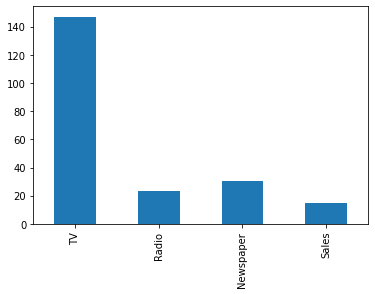

In [91]:
data.describe().loc['mean'].plot.bar()
plt.show()

In [92]:
data.describe().loc['min']

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
Name: min, dtype: float64

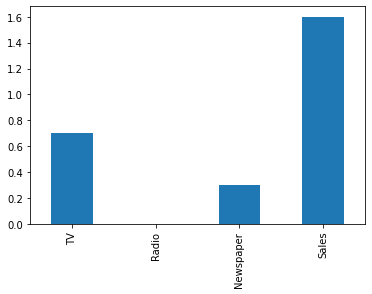

In [93]:
data.describe().loc['min'].plot.bar()
plt.show()

In [94]:
data.describe().loc['max']

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
Name: max, dtype: float64

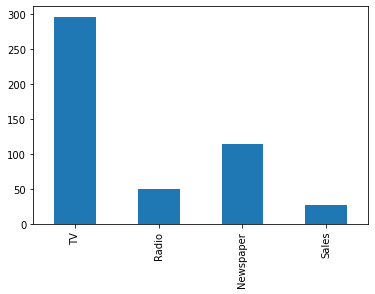

In [95]:
data.describe().loc['max'].plot.bar()
plt.show()

<ipython-input-96-b284838d3b2f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'], bins=30)


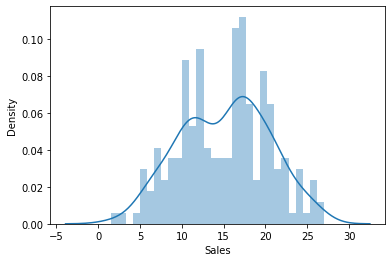

In [96]:
sns.distplot(data['Sales'], bins=30)
plt.show()

<ipython-input-97-0891874e6d8c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Newspaper'], bins=30)


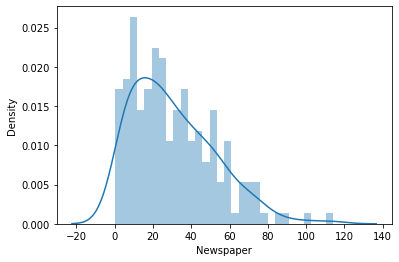

In [97]:
sns.distplot(data['Newspaper'], bins=30)
plt.show()

<ipython-input-98-4b6a73ff6848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TV'], bins=30)


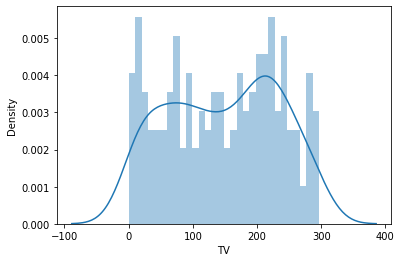

In [98]:
sns.distplot(data['TV'], bins=30)
plt.show()

<ipython-input-99-2b22d548fd87>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Radio'], bins=30)


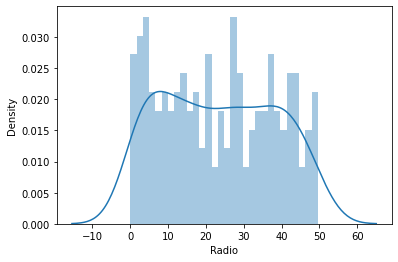

In [99]:
sns.distplot(data['Radio'], bins=30)
plt.show()

In [100]:
bc = data.corr()
bc

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [101]:
bc.shape

(4, 4)

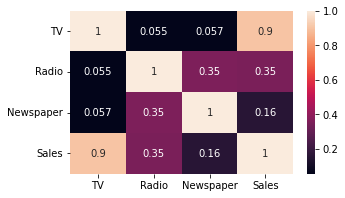

In [102]:
plt.figure(figsize=(5,3))
sns.heatmap(bc, annot=True)
plt.show()

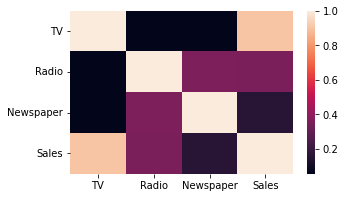

In [103]:
plt.figure(figsize=(5,3))
sns.heatmap(bc, annot=False)
plt.show()

In [104]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, : -1]
Y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)

In [105]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [106]:
print(Y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [107]:
X_train.shape, X_test.shape


((140, 3), (60, 3))

In [108]:
Y_train.shape, Y_test.shape

((140,), (60,))

In [109]:
type(X_train), type(Y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [110]:
X_train.shape, Y_train.shape

((140, 3), (140,))

In [111]:
x = data.drop('Sales', axis = 1).values
y = data['Sales'].values

In [112]:
x_sales = x[:, -1]

In [113]:
type(x_sales), type(y)

(numpy.ndarray, numpy.ndarray)

In [114]:
x_sales.shape, y.shape

((200,), (200,))

In [115]:
x_sales = x_sales.reshape(-1, 1)
y = y.reshape(-1, 1)

In [116]:
x_sales.shape, y.shape

((200, 1), (200, 1))

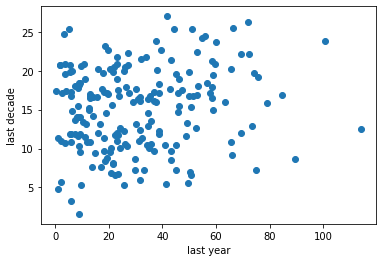

In [117]:
plt.scatter(x_sales, y)
plt.xlabel('last year')
plt.ylabel('last decade')
plt.show()

In [119]:
reg = linear_model.Lasso()
reg.fit(x_sales, y)

Lasso()

In [120]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
y_pred = reg.predict(x_sales)

In [121]:
print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 4.368169517305521
MSE = 27.088891625417514
RMSE = 5.204698994698686
R_2 = 0.024875094341569648


In [122]:
prediction_space = np.linspace(min(x_sales), max(x_sales)).reshape(-1, 1)

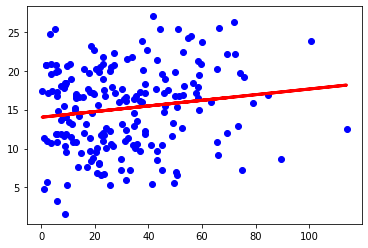

In [123]:
plt.scatter(x_sales, y, color='blue')
plt.plot(x_sales, reg.predict(x_sales), color='red', linewidth=3)
plt.show()

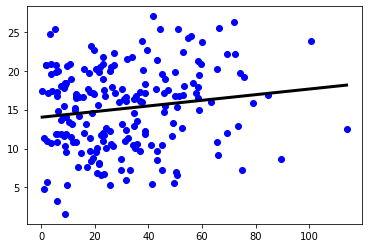

In [124]:
plt.scatter(x_sales, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [125]:
from sklearn.model_selection import train_test_split
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = [0, 0, 1, 1, 0, 0, 1, 1, 0, 1]

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [126]:
print(f'Trian-x = {x_train} \nTrain-y = {y_train}')
print(f'Test-x = {x_test} \nTest-y = {y_test}')

Trian-x = [50, 10, 40, 20, 80, 90, 60] 
Train-y = [0, 0, 1, 0, 1, 0, 0]
Test-x = [30, 100, 70] 
Test-y = [1, 1, 1]
